# Data Extraction

In [1]:
# Dependencies and Setup
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

# File to Load 
energy_data_filepath = "Resources/Raw Data/Table 5 - Canadian Electricity by source.csv"

# Read Data File and store into Pandas DataFrames
raw_energy_data = pd.read_csv(energy_data_filepath)
raw_energy_data.head()

,REF_DATE,GEO,DGUID,Class of electricity producer,Type of electricity generation,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,2005,Canada,2016A000011124,Total all classes of electricity producer,Total all types of electricity generation,Megawatt hours,210,units,0,v52300346,1.1.1,604369965.0,NaN,NaN,NaN,0
1,2005,Canada,2016A000011124,Total all classes of electricity producer,"Total hydro, tidal, wind, solar and other gene...",Megawatt hours,210,units,0,v52300348,1.1.2,360025505.0,NaN,NaN,NaN,0
2,2005,Canada,2016A000011124,Total all classes of electricity producer,Hydraulic turbine,Megawatt hours,210,units,0,v52300349,1.1.3,358446082.0,NaN,NaN,NaN,0
3,2005,Canada,2016A000011124,Total all classes of electricity producer,Tidal power turbine,Megawatt hours,210,units,0,v52300350,1.1.4,27643.0,NaN,NaN,NaN,0
4,2005,Canada,2016A000011124,Total all classes of electricity producer,Wind power turbine,Megawatt hours,210,units,0,v52300351,1.1.5,1551780.0,NaN,NaN,NaN,0


## Extract and Clean Raw Energy Data

In [2]:
# Select the columns of concerns
clean_energy_data1 = raw_energy_data[["REF_DATE","GEO","Class of electricity producer","Type of electricity generation","VALUE"]]
clean_energy_data1

,REF_DATE,GEO,Class of electricity producer,Type of electricity generation,VALUE
0,2005,Canada,Total all classes of electricity producer,Total all types of electricity generation,604369965.0
1,2005,Canada,Total all classes of electricity producer,"Total hydro, tidal, wind, solar and other gene...",360025505.0
2,2005,Canada,Total all classes of electricity producer,Hydraulic turbine,358446082.0
3,2005,Canada,Total all classes of electricity producer,Tidal power turbine,27643.0
4,2005,Canada,Total all classes of electricity producer,Wind power turbine,1551780.0
...,...,...,...,...,...
4828,2019,Nunavut,Total all classes of electricity producer,Total electricity production from combustible ...,192222.0
4829,2019,Nunavut,"Electricity producer, electric utilities",Total all types of electricity generation,192222.0
4830,2019,Nunavut,"Electricity producer, electric utilities",Total thermal generation,192222.0
4831,2019,Nunavut,"Electricity producer, electric utilities",Internal combustion turbine,NaN


In [3]:
# Select data for the entire Canada and total class of electricity producer
clean_energy_data2 =clean_energy_data1[(clean_energy_data1["GEO"] == "Canada") & 
                                       (clean_energy_data1["Class of electricity producer"] 
                                       == "Total all classes of electricity producer")]
clean_energy_data2

,REF_DATE,GEO,Class of electricity producer,Type of electricity generation,VALUE
0,2005,Canada,Total all classes of electricity producer,Total all types of electricity generation,604369965.0
1,2005,Canada,Total all classes of electricity producer,"Total hydro, tidal, wind, solar and other gene...",360025505.0
2,2005,Canada,Total all classes of electricity producer,Hydraulic turbine,358446082.0
3,2005,Canada,Total all classes of electricity producer,Tidal power turbine,27643.0
4,2005,Canada,Total all classes of electricity producer,Wind power turbine,1551780.0
...,...,...,...,...,...
4470,2019,Canada,Total all classes of electricity producer,Conventional steam turbine,NaN
4471,2019,Canada,Total all classes of electricity producer,Nuclear steam turbine,95469256.0
4472,2019,Canada,Total all classes of electricity producer,Internal combustion turbine,NaN
4473,2019,Canada,Total all classes of electricity producer,Combustion turbine,NaN


In [4]:
# Change column name
clean_energy_data3 = clean_energy_data2.rename(columns = {"REF_DATE" : "Year"})
clean_energy_data3

,Year,GEO,Class of electricity producer,Type of electricity generation,VALUE
0,2005,Canada,Total all classes of electricity producer,Total all types of electricity generation,604369965.0
1,2005,Canada,Total all classes of electricity producer,"Total hydro, tidal, wind, solar and other gene...",360025505.0
2,2005,Canada,Total all classes of electricity producer,Hydraulic turbine,358446082.0
3,2005,Canada,Total all classes of electricity producer,Tidal power turbine,27643.0
4,2005,Canada,Total all classes of electricity producer,Wind power turbine,1551780.0
...,...,...,...,...,...
4470,2019,Canada,Total all classes of electricity producer,Conventional steam turbine,NaN
4471,2019,Canada,Total all classes of electricity producer,Nuclear steam turbine,95469256.0
4472,2019,Canada,Total all classes of electricity producer,Internal combustion turbine,NaN
4473,2019,Canada,Total all classes of electricity producer,Combustion turbine,NaN


In [5]:
# Genearate a pivot table for the electricity production of each energy type by year
final_energy_data = pd.pivot_table(clean_energy_data3, index="Year", columns="Type of electricity generation", 
                                      values="VALUE", aggfunc=sum, fill_value = 0).rename_axis(None, axis=1)
final_energy_data

,Combustion turbine,Conventional steam turbine,Hydraulic turbine,Internal combustion turbine,Nuclear steam turbine,Other types of electricity generation,Solar,Tidal power turbine,Total all types of electricity generation,Total electricity production from combustible fuels,"Total hydro, tidal, wind, solar and other generation",Total thermal generation,Wind power turbine
Year,,,,,,,,,,,,,
2005,25892974,130320252,358446082,1301338,86829896,0,0,27643,604369965,0,360025505,244344460,1551780
2006,25811955,118877657,349468303,3591329,92418514,0,0,19144,592635237,0,351935782,240699455,2448335
2007,32237570,127778534,364055135,1498789,88190431,0,0,22524,616760189,0,367054865,249705324,2977206
2008,30782510,117666179,373822743,1425052,90585015,0,0,15018,618047146,0,377588390,240458756,3750629
2009,32728246,102607748,365110421,1570922,84991779,1918497,4502,29954,595537304,0,373638609,221898695,6575235
2010,38019362,103118558,347980845,1615274,85526588,2975953,115745,27680,588016955,0,359737173,228279782,8636950
2011,44283027,99411207,372076377,1609096,88291216,2509521,256935,26095,618550162,0,384955616,233594546,10086688
2012,45330296,89871261,376574355,1555195,89492389,2723937,315843,27128,617088777,0,390839636,226249141,11198373
2013,43756123,90388012,387980873,1645827,97584431,2441392,360478,14830,635205955,0,401831562,233374393,11033989


## Use Raw Data to Generate Renewable Energy Data

In [6]:
# Select renewable energy columns
renewable_energy_data = final_energy_data[["Hydraulic turbine", "Solar", "Tidal power turbine", "Wind power turbine",
                                             "Other types of electricity generation",
                                             "Total hydro, tidal, wind, solar and other generation"]]
renewable_energy_data

,Hydraulic turbine,Solar,Tidal power turbine,Wind power turbine,Other types of electricity generation,"Total hydro, tidal, wind, solar and other generation"
Year,,,,,,
2005,358446082,0,27643,1551780,0,360025505
2006,349468303,0,19144,2448335,0,351935782
2007,364055135,0,22524,2977206,0,367054865
2008,373822743,0,15018,3750629,0,377588390
2009,365110421,4502,29954,6575235,1918497,373638609
2010,347980845,115745,27680,8636950,2975953,359737173
2011,372076377,256935,26095,10086688,2509521,384955616
2012,376574355,315843,27128,11198373,2723937,390839636
2013,387980873,360478,14830,11033989,2441392,401831562


In [7]:
# Rename the total column
renewable_energy_data = renewable_energy_data.rename(columns = {
    "Total hydro, tidal, wind, solar and other generation" : "Total renewable energy generation"
})
renewable_energy_data

,Hydraulic turbine,Solar,Tidal power turbine,Wind power turbine,Other types of electricity generation,Total renewable energy generation
Year,,,,,,
2005,358446082,0,27643,1551780,0,360025505
2006,349468303,0,19144,2448335,0,351935782
2007,364055135,0,22524,2977206,0,367054865
2008,373822743,0,15018,3750629,0,377588390
2009,365110421,4502,29954,6575235,1918497,373638609
2010,347980845,115745,27680,8636950,2975953,359737173
2011,372076377,256935,26095,10086688,2509521,384955616
2012,376574355,315843,27128,11198373,2723937,390839636
2013,387980873,360478,14830,11033989,2441392,401831562


In [8]:
# Output this cleaned renewable energy production table
renewable_energy_data.to_csv("Resources/Clean Data/Table 5a.csv")

## Use Raw Data to Generate Oil Energy Data

In [9]:
# Select oil energy columns
oil_energy_data = final_energy_data[["Combustion turbine", "Conventional steam turbine","Internal combustion turbine",
                                     "Nuclear steam turbine","Total electricity production from combustible fuels",
                                     "Total thermal generation"]]
oil_energy_data

,Combustion turbine,Conventional steam turbine,Internal combustion turbine,Nuclear steam turbine,Total electricity production from combustible fuels,Total thermal generation
Year,,,,,,
2005,25892974,130320252,1301338,86829896,0,244344460
2006,25811955,118877657,3591329,92418514,0,240699455
2007,32237570,127778534,1498789,88190431,0,249705324
2008,30782510,117666179,1425052,90585015,0,240458756
2009,32728246,102607748,1570922,84991779,0,221898695
2010,38019362,103118558,1615274,85526588,0,228279782
2011,44283027,99411207,1609096,88291216,0,233594546
2012,45330296,89871261,1555195,89492389,0,226249141
2013,43756123,90388012,1645827,97584431,0,233374393


In [10]:
# Combined columns that contain 0 into one complete column
oil_energy_data["Combustion fuels"] = (oil_energy_data["Combustion turbine"] + 
                                        oil_energy_data["Conventional steam turbine"] + 
                                        oil_energy_data["Internal combustion turbine"] + 
                                        oil_energy_data["Total electricity production from combustible fuels"])
oil_energy_data

C:\Users\laich\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Combustion turbine,Conventional steam turbine,Internal combustion turbine,Nuclear steam turbine,Total electricity production from combustible fuels,Total thermal generation,Combustion fuels
Year,,,,,,,
2005,25892974,130320252,1301338,86829896,0,244344460,157514564
2006,25811955,118877657,3591329,92418514,0,240699455,148280941
2007,32237570,127778534,1498789,88190431,0,249705324,161514893
2008,30782510,117666179,1425052,90585015,0,240458756,149873741
2009,32728246,102607748,1570922,84991779,0,221898695,136906916
2010,38019362,103118558,1615274,85526588,0,228279782,142753194
2011,44283027,99411207,1609096,88291216,0,233594546,145303330
2012,45330296,89871261,1555195,89492389,0,226249141,136756752
2013,43756123,90388012,1645827,97584431,0,233374393,135789962


In [11]:
# Use the combined column as new table
oil_energy_data = oil_energy_data[["Combustion fuels", "Nuclear steam turbine", "Total thermal generation"]]
oil_energy_data

,Combustion fuels,Nuclear steam turbine,Total thermal generation
Year,,,
2005,157514564,86829896,244344460
2006,148280941,92418514,240699455
2007,161514893,88190431,249705324
2008,149873741,90585015,240458756
2009,136906916,84991779,221898695
2010,142753194,85526588,228279782
2011,145303330,88291216,233594546
2012,136756752,89492389,226249141
2013,135789962,97584431,233374393


In [12]:
# Output this cleaned oil energy production table
oil_energy_data.to_csv("Resources/Clean Data/Table 5b.csv")

## Extract and Clean Currency Data

In [13]:
# File to Load 
currency_data_filepath = "Resources/Clean Data/Monthly_Exchange_Rate.csv"

# Read Data File and store into Pandas DataFrames
raw_currency_data = pd.read_csv(currency_data_filepath)
raw_currency_data.head()

,Date,USD/CAD,CAD/USD
0,2005-01-01,1.205198,0.829739
1,2005-02-01,1.239963,0.806476
2,2005-03-01,1.233808,0.810499
3,2005-04-01,1.214291,0.823526
4,2005-05-01,1.249595,0.800259


In [14]:
# Extreact from date column to get year 
raw_currency_data["Year"] = raw_currency_data["Date"].str[0:4] 
raw_currency_data

,Date,USD/CAD,CAD/USD,Year
0,2005-01-01,1.205198,0.829739,2005
1,2005-02-01,1.239963,0.806476,2005
2,2005-03-01,1.233808,0.810499,2005
3,2005-04-01,1.214291,0.823526,2005
4,2005-05-01,1.249595,0.800259,2005
...,...,...,...,...
185,2020-06-01,1.369917,0.729971,2020
186,2020-07-01,1.358661,0.736019,2020
187,2020-08-01,1.341830,0.745251,2020
188,2020-09-01,1.301410,0.768397,2020


In [15]:
# Groupby to get yearly currency data
yearly_exchange_rate = pd.DataFrame(raw_currency_data.groupby("Year")["CAD/USD"].mean())
yearly_exchange_rate

,CAD/USD
Year,
2005,0.825173
2006,0.883881
2007,0.930507
2008,0.955629
2009,0.874752
2010,0.963620
2011,1.016032
2012,0.999054
2013,0.971670


In [16]:
# Change column name
yearly_exchange_rate = yearly_exchange_rate.rename(columns = {"CAD/USD" : "Candian Dollar Index"})
yearly_exchange_rate

,Candian Dollar Index
Year,
2005,0.825173
2006,0.883881
2007,0.930507
2008,0.955629
2009,0.874752
2010,0.963620
2011,1.016032
2012,0.999054
2013,0.971670


In [17]:
# Output this cleaned yearly exchange rate table
yearly_exchange_rate.to_csv("Resources/Clean Data/Table 6.csv")

# Data Transformation

In [18]:
# File to Load 
renewable_data_filepath = "Resources/Clean Data/Table 5a.csv"
oil_data_filepath = "Resources/Clean Data/Table 5b.csv"
yearly_currency_filepath = "Resources/Clean Data/Table 6.csv"

# Read Data File and store into Pandas DataFrames
renewable_energy_data = pd.read_csv(renewable_data_filepath)
oil_energy_data = pd.read_csv(oil_data_filepath)
yearly_currency_data = pd.read_csv(yearly_currency_filepath)

In [19]:
# Combine the three data together
merged_canada_data = pd.merge(yearly_currency_data, renewable_energy_data, on = "Year", how = "inner")
merged_canada_data = pd.merge(merged_canada_data, oil_energy_data, on = "Year", how = "inner")
merged_canada_data

,Year,Candian Dollar Index,Hydraulic turbine,Solar,Tidal power turbine,Wind power turbine,Other types of electricity generation,Total renewable energy generation,Combustion fuels,Nuclear steam turbine,Total thermal generation
0,2005,0.825173,358446082,0,27643,1551780,0,360025505,157514564,86829896,244344460
1,2006,0.883881,349468303,0,19144,2448335,0,351935782,148280941,92418514,240699455
2,2007,0.930507,364055135,0,22524,2977206,0,367054865,161514893,88190431,249705324
3,2008,0.955629,373822743,0,15018,3750629,0,377588390,149873741,90585015,240458756
4,2009,0.874752,365110421,4502,29954,6575235,1918497,373638609,136906916,84991779,221898695
5,2010,0.963620,347980845,115745,27680,8636950,2975953,359737173,142753194,85526588,228279782
6,2011,1.016032,372076377,256935,26095,10086688,2509521,384955616,145303330,88291216,233594546
7,2012,0.999054,376574355,315843,27128,11198373,2723937,390839636,136756752,89492389,226249141
8,2013,0.971670,387980873,360478,14830,11033989,2441392,401831562,135789962,97584431,233374393
9,2014,0.908495,378786255,325184,15483,12688899,2238903,394054724,134318871,101207807,235526678


In [20]:
merged_canada_data = merged_canada_data.set_index("Year")
merged_canada_data

,Candian Dollar Index,Hydraulic turbine,Solar,Tidal power turbine,Wind power turbine,Other types of electricity generation,Total renewable energy generation,Combustion fuels,Nuclear steam turbine,Total thermal generation
Year,,,,,,,,,,
2005,0.825173,358446082,0,27643,1551780,0,360025505,157514564,86829896,244344460
2006,0.883881,349468303,0,19144,2448335,0,351935782,148280941,92418514,240699455
2007,0.930507,364055135,0,22524,2977206,0,367054865,161514893,88190431,249705324
2008,0.955629,373822743,0,15018,3750629,0,377588390,149873741,90585015,240458756
2009,0.874752,365110421,4502,29954,6575235,1918497,373638609,136906916,84991779,221898695
2010,0.963620,347980845,115745,27680,8636950,2975953,359737173,142753194,85526588,228279782
2011,1.016032,372076377,256935,26095,10086688,2509521,384955616,145303330,88291216,233594546
2012,0.999054,376574355,315843,27128,11198373,2723937,390839636,136756752,89492389,226249141
2013,0.971670,387980873,360478,14830,11033989,2441392,401831562,135789962,97584431,233374393


In [21]:
# Output this combined data
merged_canada_data.to_csv("Transformed Data/Part 4.csv")

# Plotting

In [22]:
# File to Load
canada_data_filepath = "Transformed Data/Part 4.csv"

# Read Data File and store into Pandas DataFrames
canada_complete_data = pd.read_csv(canada_data_filepath)

## Analysis of Production Growth of Each Rewanable Energy

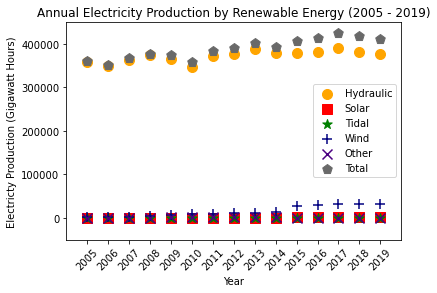

In [24]:
# Generate and Format each renewable energy electricity production scatter plot in one figure
plt.scatter(canada_complete_data["Year"], canada_complete_data["Hydraulic turbine"]/1000, color = "orange", s = 100, 
            marker = "o", label = "Hydraulic")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Solar"]/1000, color = "red", s = 100, marker = "s", 
            label = "Solar")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Tidal power turbine"]/1000, color = "green", s = 100, 
            marker = "*",label = "Tidal")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Wind power turbine"]/1000, color = "navy", s = 100, 
            marker = "+", label = "Wind")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Other types of electricity generation"]/1000, 
            color = "indigo", s = 100, marker = "x", label = "Other")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Total renewable energy generation"]/1000, 
            color = "dimgrey", s = 100, marker = "p",label = "Total")
plt.xticks(canada_complete_data["Year"], canada_complete_data["Year"], rotation = 45)
plt.xlim(2004,2020)
plt.ylim(-50000, 450000)
plt.xlabel("Year")
plt.ylabel("Electricty Production (Gigawatt Hours)")
plt.title("Annual Electricity Production by Renewable Energy (2005 - 2019)")
plt.legend(loc="right")
plt.savefig("Plots\Question 5 - Time vs. Types of Renewable Sources for Canada.png")

## Analysis of Production Growth of Each Oil Energy

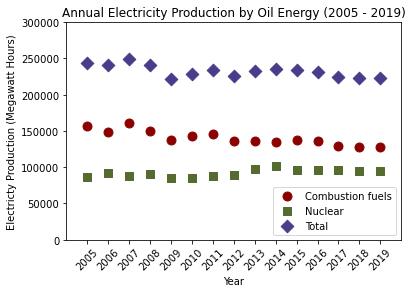

In [25]:
# Generate and Format each oil energy electricity production scatter plot in one figure
plt.scatter(canada_complete_data["Year"], canada_complete_data["Combustion fuels"]/1000, color = "darkred", s = 80, 
            marker = "o", label = "Combustion fuels")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Nuclear steam turbine"]/1000, color = "darkolivegreen", s = 80, 
            marker = "s",label = "Nuclear")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Total thermal generation"]/1000, color = "darkslateblue", 
            s = 80, marker = "D", label = "Total")
plt.xticks(canada_complete_data["Year"], canada_complete_data["Year"], rotation = 45)
plt.xlim(2004,2020)
plt.ylim(0, 300000)
plt.xlabel("Year")
plt.ylabel("Electricty Production (Megawatt Hours)")
plt.title("Annual Electricity Production by Oil Energy (2005 - 2019)")
plt.legend(loc="lower right")
plt.savefig("Plots\Question 5 - Time vs. Types of Oil Sources for Canada.png")

## Comparing Renewable Energy and Oil Energy Production

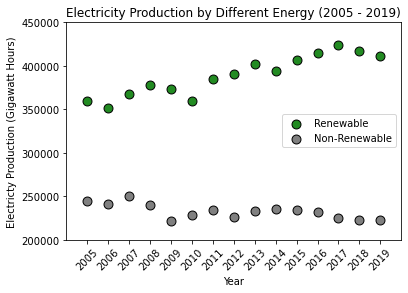

In [26]:
# Generate and Format scatter plot of electricity production by total renewable energy and total oil energy
plt.scatter(canada_complete_data["Year"], canada_complete_data["Total renewable energy generation"]/1000, s= 80, 
            facecolor = "forestgreen", edgecolor = "black", label = "Renewable")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Total thermal generation"]/1000, s= 80, 
            facecolor = "grey", edgecolor = "black", label = "Non-Renewable")
plt.xticks(canada_complete_data["Year"], canada_complete_data["Year"], rotation = 45)
plt.xlim(2004,2020)
plt.ylim(200000, 450000)
plt.xlabel("Year")
plt.ylabel("Electricty Production (Gigawatt Hours)")
plt.title("Electricity Production by Different Energy (2005 - 2019)")
plt.legend(loc = "right")
plt.savefig("Plots\Question 5 - Time vs. Oil and Renewable for Canada.png")

In [27]:
# Calculate the regression line for renewable energy production
renewable_regression = st.linregress(canada_complete_data["Year"], 
                                     canada_complete_data["Total renewable energy generation"]/1000)
renewable_regression_line = renewable_regression[0] * canada_complete_data["Year"] + renewable_regression[1]

In [28]:
# Calculate the regression line for oil energy production
oil_regression = st.linregress(canada_complete_data["Year"], 
                                     canada_complete_data["Total thermal generation"]/1000)
oil_regression_line = oil_regression[0] * canada_complete_data["Year"] + oil_regression[1]

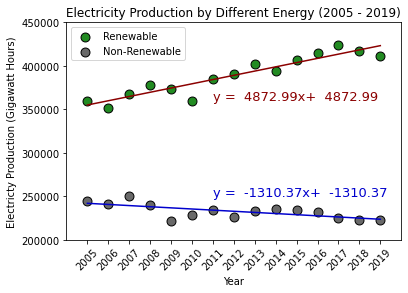

In [29]:
# Put two regression lines into the scatter plot generated above
plt.scatter(canada_complete_data["Year"], canada_complete_data["Total renewable energy generation"]/1000, s= 80, 
            facecolor = "forestgreen", edgecolor = "black", label = "Renewable")
plt.scatter(canada_complete_data["Year"], canada_complete_data["Total thermal generation"]/1000, s= 80, 
            facecolor = "dimgrey", edgecolor = "black", label = "Non-Renewable")
plt.plot(canada_complete_data["Year"], renewable_regression_line, color = "darkred")
plt.plot(canada_complete_data["Year"], oil_regression_line, color = "mediumblue")
plt.annotate("y =  " + str(round(renewable_regression[0],2)) + "x+  " + str(round(renewable_regression[0],2)), (2011,360000), 
             fontsize = 13, color = "darkred")
plt.annotate("y =  " + str(round(oil_regression[0],2)) + "x+  " + str(round(oil_regression[0],2)), (2011,250000), 
             fontsize = 13, color = "mediumblue")
plt.xticks(canada_complete_data["Year"], canada_complete_data["Year"], rotation = 45)
plt.xlim(2004,2020)
plt.ylim(200000, 450000)
plt.xlabel("Year")
plt.ylabel("Electricty Production (Gigawatt Hours)")
plt.title("Electricity Production by Different Energy (2005 - 2019)")
plt.legend(loc = "best")
plt.savefig("Plots\Question 5 - Time vs. Oil and Renewable (with Regression) for Canada.png")

## Relationship between Canadian Dollar (Index) and Energy Source

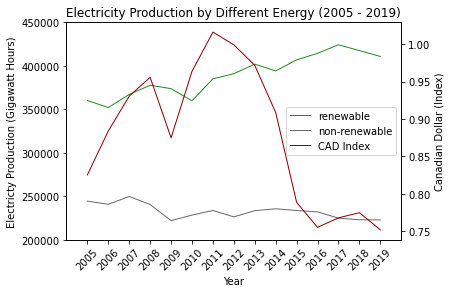

In [30]:
## Use subplots to create energy production line graph and currency line graph in one figure with two y-axis
fig, ax1 = plt.subplots()

fig1, = ax1.plot(canada_complete_data["Year"], canada_complete_data["Total renewable energy generation"]/1000, 
                color = "forestgreen", linewidth = 1, label = "a")
fig2, = ax1.plot(canada_complete_data["Year"], canada_complete_data["Total thermal generation"]/1000, color = "dimgrey", 
                linewidth = 1, label = "b")
plt.xticks(canada_complete_data["Year"], canada_complete_data["Year"], rotation = 45)
plt.xlim(2004,2020)
plt.ylim(200000, 450000)
plt.xlabel("Year")
plt.ylabel("Electricty Production (Gigawatt Hours)")
plt.title("Electricity Production by Different Energy (2005 - 2019)")

ax2 = ax1.twinx()
fig3, = ax2.plot(canada_complete_data["Year"], canada_complete_data["Candian Dollar Index"], color = "darkred", 
                       linewidth = 1, label = "dfad")

ax2.set_ylabel("Canadian Dollar (Index)")
plt.legend([fig1,fig2,fig3], ["renewable", "non-renewable", "CAD Index"], loc = "right")
plt.savefig("Plots\Question 6 - Sources vs. CAD Index.png")